<a href="https://colab.research.google.com/github/Haileykim25/test4class/blob/main/chapter05_fundamentals_of_ml_i%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
np.random.random((len(train_images), 784))

array([[0.52630259, 0.31973751, 0.0366051 , ..., 0.71451   , 0.7944738 ,
        0.78142901],
       [0.43264602, 0.51626212, 0.68030551, ..., 0.85042851, 0.17103558,
        0.63165274],
       [0.7870852 , 0.05241646, 0.01123677, ..., 0.1396995 , 0.90006568,
        0.54264353],
       ...,
       [0.79801469, 0.38792522, 0.12157475, ..., 0.1013637 , 0.19499918,
        0.58971542],
       [0.74113869, 0.39510314, 0.15686025, ..., 0.21875646, 0.98154978,
        0.79801513],
       [0.05144337, 0.33513223, 0.69442513, ..., 0.84585984, 0.97423932,
        0.27648417]])

In [3]:
np.zeros((len(train_images), 784))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**Training the same model on MNIST data with noise channels or all-zero channels**

In [4]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.7042 - loss: 1.0148 - val_accuracy: 0.9120 - val_loss: 0.2855
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.9118 - loss: 0.2751 - val_accuracy: 0.9116 - val_loss: 0.2838
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9469 - loss: 0.1706 - val_accuracy: 0.9470 - val_loss: 0.1771
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9623 - loss: 0.1228 - val_accuracy: 0.9496 - val_loss: 0.1680
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9730 - loss: 0.0850 - val_accuracy: 0.9647 - val_loss: 0.1194
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9812 - loss: 0.0600 - val_accuracy: 0.9645 - val_loss: 0.1330
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9838 - loss: 0.0488 - val_accuracy: 0.9693 - val_loss: 0.1172
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9913 - loss: 0.0296 - val_ac

In [5]:
model = get_model()
#original data..

**Plotting a validation accuracy comparison**

In [6]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
val_acc_ori = history_ori.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.plot(epochs, val_acc_ori, "r--",
         label="Validation accuracy with original data")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

NameError: name 'history_ori' is not defined

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [7]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.1038 - loss: 2.3261 - val_accuracy: 0.1045 - val_loss: 2.3072
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.1199 - loss: 2.2978 - val_accuracy: 0.1039 - val_loss: 2.3144
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.1320 - loss: 2.2883 - val_accuracy: 0.1034 - val_loss: 2.3172
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.1413 - loss: 2.2769 - val_accuracy: 0.1018 - val_loss: 2.3218
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.1583 - loss: 2.2601 - val_accuracy: 0.0988 - val_loss: 2.3388
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.1736 - loss: 2.2374 - val_accuracy: 0.1045 - val_loss: 2.3416
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.1838 - loss: 2.2129 - val_accuracy: 0.1016 - val_loss: 2.3516
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.2044 - loss: 2.1869 - 

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [8]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4142 - loss: 3053.1611 - val_accuracy: 0.2327 - val_loss: 2.1540
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.2298 - loss: 2.4527 - val_accuracy: 0.2372 - val_loss: 2.2076
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.2401 - loss: 2.5447 - val_accuracy: 0.1949 - val_loss: 2.2433
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.2078 - loss: 2.7563 - val_accuracy: 0.2226 - val_loss: 2.3827
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.2176 - loss: 2.4212 - val_accuracy: 0.2216 - val_loss: 2.1850
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.2159 - loss: 2.3821 - val_accuracy: 0.2269 - val_loss: 2.2142
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.2299 - loss: 2.3408 - val_accuracy: 0.2198 - val_loss: 2.3319
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.2155 - loss: 2.3965 - val_a

**The same model with a more appropriate learning rate**

In [9]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8301 - loss: 0.8478 - val_accuracy: 0.9571 - val_loss: 0.1551
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9640 - loss: 0.1283 - val_accuracy: 0.9668 - val_loss: 0.1297
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9745 - loss: 0.0912 - val_accuracy: 0.9685 - val_loss: 0.1466
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9797 - loss: 0.0772 - val_accuracy: 0.9686 - val_loss: 0.1626
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9821 - loss: 0.0687 - val_accuracy: 0.9649 - val_loss: 0.2103
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9845 - loss: 0.0614 - val_accuracy: 0.9704 - val_loss: 0.1943
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9873 - loss: 0.0514 - val_accuracy: 0.9719 - val_loss: 0.1957
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9891 - loss: 0.0443 - val_accu

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [10]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7258 - loss: 1.0636 - val_accuracy: 0.9055 - val_loss: 0.3619
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9004 - loss: 0.3658 - val_accuracy: 0.9150 - val_loss: 0.3103
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9089 - loss: 0.3251 - val_accuracy: 0.9200 - val_loss: 0.2929
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9184 - loss: 0.2957 - val_accuracy: 0.9196 - val_loss: 0.2849
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9175 - loss: 0.2942 - val_accuracy: 0.9247 - val_loss: 0.2782
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9215 - loss: 0.2791 - val_accuracy: 0.9224 - val_loss: 0.2777
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9221 - loss: 0.2822 - val_accuracy: 0.9254 - val_loss: 0.2722
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9243 - loss: 0.2672 - val_accuracy: 0.

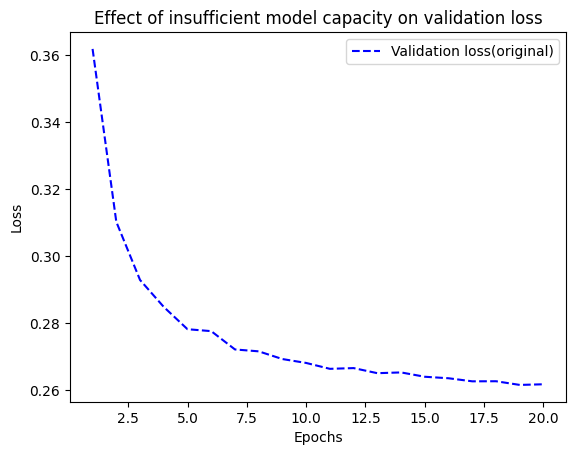

In [16]:
import matplotlib.pyplot as plt
val_loss_ori = history_small_model.history["val_loss"]
#val_loss_small = history_smaller_model.history["val_loss"]
#val_loss_large = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss_ori, "b--",
         label="Validation loss(original)")
#plt.plot(epochs, val_loss_small, "r--",
         #label="Validation loss(small)")
#plt.plot(epochs, val_loss_large, "g--",
         #label="Validation loss(large)")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [17]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.6607 - loss: 0.6189 - val_accuracy: 0.8522 - val_loss: 0.4271
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8879 - loss: 0.3600 - val_accuracy: 0.8855 - val_loss: 0.3173
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9193 - loss: 0.2544 - val_accuracy: 0.8562 - val_loss: 0.3423
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9332 - loss: 0.2037 - val_accuracy: 0.8923 - val_loss: 0.2761
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9483 - loss: 0.1625 - val_accuracy: 0.8802 - val_loss: 0.2951
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9570 - loss: 0.1396 - val_accuracy: 0.8887 - val_loss: 0.2837
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9683 - loss: 0.1154 - val_accuracy: 0.8831 - val_loss: 0.3076
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accurac

**Version of the model with lower capacity**

In [18]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.6404 - loss: 0.6516 - val_accuracy: 0.8493 - val_loss: 0.5569
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8488 - loss: 0.5217 - val_accuracy: 0.8267 - val_loss: 0.4750
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8853 - loss: 0.4314 - val_accuracy: 0.8592 - val_loss: 0.4112
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9073 - loss: 0.3638 - val_accuracy: 0.8837 - val_loss: 0.3613
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9191 - loss: 0.3065 - val_accuracy: 0.8883 - val_loss: 0.3292
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9271 - loss: 0.2679 - val_accuracy: 0.8904 - val_loss: 0.3070
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9348 - loss: 0.2364 - val_accuracy: 0.8853 - val_loss: 0.2977
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9398 - loss: 0.2134 - val_accuracy: 0.8869 - v

**Version of the model with higher capacity**

In [19]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 358ms/step - accuracy: 0.6118 - loss: 0.6436 - val_accuracy: 0.8633 - val_loss: 0.3420
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 295ms/step - accuracy: 0.8459 - loss: 0.3589 - val_accuracy: 0.8600 - val_loss: 0.3240
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 352ms/step - accuracy: 0.9137 - loss: 0.2222 - val_accuracy: 0.8744 - val_loss: 0.2928
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 357ms/step - accuracy: 0.9351 - loss: 0.1767 - val_accuracy: 0.8892 - val_loss: 0.2796
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 304ms/step - accuracy: 0.9491 - loss: 0.1385 - val_accuracy: 0.8853 - val_loss: 0.2984
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 318ms/step - accuracy: 0.9692 - loss: 0.0896 - val_accuracy: 0.8611 - val_loss: 0.3290
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 327ms/step - accuracy: 0.9848 - loss: 0.0612 - val_accuracy: 0.8831 - val_loss: 0.3056
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 334ms/step - accuracy: 0.9939 - loss: 0.0330 - val_accur

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [20]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.6819 - loss: 0.7060 - val_accuracy: 0.8359 - val_loss: 0.5126
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8801 - loss: 0.4553 - val_accuracy: 0.8820 - val_loss: 0.4065
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.9155 - loss: 0.3515 - val_accuracy: 0.8864 - val_loss: 0.3716
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9259 - loss: 0.2993 - val_accuracy: 0.8865 - val_loss: 0.3552
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9362 - loss: 0.2731 - val_accuracy: 0.8831 - val_loss: 0.3562
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9446 - loss: 0.2522 - val_accuracy: 0.8847 - val_loss: 0.3568
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9520 - loss: 0.2318 - val_accuracy: 0.8860 - val_loss: 0.3521
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9548 - loss: 0.2249 - val_accuracy: 0.8867 - v

**Different weight regularizers available in Keras**

In [21]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [22]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.5898 - loss: 0.6671 - val_accuracy: 0.8432 - val_loss: 0.5103
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7647 - loss: 0.5223 - val_accuracy: 0.8722 - val_loss: 0.4055
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8249 - loss: 0.4302 - val_accuracy: 0.8835 - val_loss: 0.3278
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8677 - loss: 0.3563 - val_accuracy: 0.8891 - val_loss: 0.2956
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8948 - loss: 0.3082 - val_accuracy: 0.8832 - val_loss: 0.2841
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9089 - loss: 0.2644 - val_accuracy: 0.8894 - val_loss: 0.2795
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9205 - loss: 0.2373 - val_accuracy: 0.8837 - val_loss: 0.2858
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9331 - loss: 0.2050 - val_accuracy: 0.8913 - v

## Summary